# Lab 3 - Visualization

Last update: 11/11/2023

- Name: Cao Nguyễn Khánh
- Student ID: 21127627

***

## Work and submission guidelines

**Work on your assignment**

- You need to do your assignment directly in this notebook. First, fill out your name and ID at the beginning of the file. In the notebook, fill in places that say:
```python
#TODO
```

- During your work, you can print out the result, create more cells to test, or create more functions to handle things. Please note that <font color=red>you are not allowed to delete or modify my code cells</font> (except in the case that mentioned above). Remember to remove `raise NotImplementedError("not implement")` when running the code.

- Always press `Ctrl + S` in order to save your work.

**Notes:**

    *  Copy means zero
    *  You have to submit your work on time. No exception
    *  Any questions about your grade are based on the assignment submitted on Moodle
    *  Wrong submission takes you -2 points

**Submit your work**

- When grading your assignment, I will choose `Kernel` - `Restart Kernel & Run All Cells` in order to restart the kernel and run all cells in your notebook. Therefore, you should do that before submitting to ensure that the outputs are all as expected.

- After that, rename you notebook with your student ID (e.g. `1234567.ipynb`) and submit on Moodle.

- <font color=red>Please strictly follow the submission rules.</font>

## Abstract and general requirements

**Abstract**

- In this assignment, you are required to visualize data and results. This task is very important since it provides reader (your clients, your boss,...) an overview of the data as well as your results.

- You will visualize the data in order to answer some questions. By answering these questions, you are able to get some insights from data.

- You will also visualize the results of machine learning model to be able to know whether your model works well or not.

**General requirements**

- Every charts **must have their own name, axes name, legends**.
- The charts you draw must not only be correct but also beautiful:
    - The correctness is shown in choosing the right chart and accurately calculating the data to draw the chart.
    - The beauty is expressed in the UI/UX of the chart. The beauty of UI is shown in choosing the colors, layout of the chart. The beauty of UX is reflected in the fact that the reader can easily capture your message conveyed through your notebook.

---

In [1]:
# visialize stuff

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import json
# !pip install geopandas
import geopandas

# modeling stuff
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import random

## Data visualization

- In this section, you are going to compute and visualize some information about Covid-19
- The data prepared in `./data` was collected from Worldometer
- Link: https://www.worldometers.info/coronavirus/

In [2]:
# read the data into a dataframe
df = pd.read_csv('./data/data.csv')
print(f'Shape: {df.shape}')
df.head(5)

Shape: (219, 10)


,Country Name,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Critical Cases,Total Tests,Population
0,USA,"31,990,143",NaN,"576,298",NaN,"24,560,856","6,852,989","9,321","420,822,699","332,516,170"
1,India,"13,689,453","+3,380","171,089",NaN,"12,253,697","1,264,667","8,944","259,207,108","1,390,568,032"
2,Brazil,"13,521,409",NaN,"355,031",NaN,"11,957,068","1,209,310","8,318","28,600,000","213,737,070"
3,France,"5,067,216",NaN,"99,135",NaN,"310,934","4,657,147","5,916","70,140,847","65,386,285"
4,Russia,"4,657,883","+8,173","103,601",338.0,"4,281,776","272,506","2,300","124,100,000","145,983,351"


### Requrement #1: Preprocess

- **TODO**: Take a look at the data files, then go to the URL aforementioned, explore the meaning of columns in the dataset and fill in the blanks:
    - Country Name: The "Country Name" column in the dataset should represent the names of different countries.
    - Total Cases: This column likely represents the total number of confirmed COVID-19 cases in each country.
    - New Cases: This column probably indicates the number of new COVID-19 cases reported on a given day.
    - Total Deaths: This column likely represents the total number of deaths due to COVID-19 in each country.
    - New Deaths: This column probably indicates the number of new deaths reported on a given day.
    - Total Recovered: This column should represent the total number of people who have recovered from COVID-19 in each country.
    - Active Cases: The number of active cases is usually calculated as (Total Cases - Total Deaths - Total Recovered) and represents the current cases that are still active.
    - Critical Cases: This column probably represents the number of critical cases, indicating the severity of the illness.
    - Total Tests: This column likely represents the total number of COVID-19 tests conducted in each country.
    - Population: This column should represent the total population of each country.

- Check the data with `info()` function

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    object 
 2   New Cases        46 non-null     object 
 3   Total Deaths     219 non-null    object 
 4   New Deaths       32 non-null     float64
 5   Total Recovered  217 non-null    object 
 6   Active Cases     217 non-null    object 
 7   Critical Cases   146 non-null    object 
 8   Total Tests      210 non-null    object 
 9   Population       219 non-null    object 
dtypes: float64(1), object(9)
memory usage: 17.2+ KB


- You can see that `New Cases`, `New Deaths`, `Critical Cases` have a lot of missing data (at least 33.3%). Therefore, we have to remove these columns.
- Most of data in columns are `object` type, which are not suitable at all. They should be converted to integer.
- `Total Recovered`, `Active Cases` and `Total Tests` only have a few missing values, so we can fill in these missing values with median value of each column.

In [4]:
# TODO: drop New Cases, New Deaths, Critical Cases
# raise NotImplementedError('not implemented')
columns_to_drop = ['New Cases', 'New Deaths', 'Critical Cases']
df = df.drop(columns=columns_to_drop)

# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country Name     219 non-null    object
 1   Total Cases      219 non-null    object
 2   Total Deaths     219 non-null    object
 3   Total Recovered  217 non-null    object
 4   Active Cases     217 non-null    object
 5   Total Tests      210 non-null    object
 6   Population       219 non-null    object
dtypes: object(7)
memory usage: 12.1+ KB


In [5]:
# TODO: convert data to integer. if the converter returns error, leave it a None
# raise NotImplementedError('not implemented')

def convert_to_int(value):
    try:
        return int(value.replace(',', '')) if pd.notna(value) and value != ' ' else None
    except ValueError:
        return None

for col in df.columns[1:]:
    df[col] = df[col].apply(convert_to_int)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    int64  
 2   Total Deaths     204 non-null    float64
 3   Total Recovered  217 non-null    float64
 4   Active Cases     217 non-null    float64
 5   Total Tests      210 non-null    float64
 6   Population       219 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 12.1+ KB


**TODO**: We did handle missing value before. Why do we still have missing values here?
- After converting the data to the integer type, some values are lost.
- Because there are some values in the dataframe that are ' ' (empty strings), which is not NaN, the data appears to be complete. However, when converted to the integer type, they are transformed into None, we still have missing values here.


In [6]:
# TODO: fill in the missing data with median value
# raise NotImplementedError('not implemented')

# Get the list of columns in the dataframe
cols_list = list(df.columns)
    
# Exclude the last column - Country, Year
cols_list.remove("Country Name")

    
# Replace all None values with NaN, fillna only works on nans
df.fillna(value=np.nan, inplace=True)
    
# Replace all NaN values with the mean of the column values
for col in cols_list:
    df[col].fillna((df[col].median()), inplace=True)

# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    int64  
 2   Total Deaths     219 non-null    float64
 3   Total Recovered  219 non-null    float64
 4   Active Cases     219 non-null    float64
 5   Total Tests      219 non-null    float64
 6   Population       219 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 12.1+ KB


**TODO**: Why do we have `float64` here?   

- In Pandas, when a column of a DataFrame contains both integer and None (NaN) values, the column will automatically be converted to the float data type. This happens because the None data type is not an integer data type, and Pandas aims to maintain consistency among values within the column.
- 
A column in a DataFrame can only have a single data type. When there is a combination of integer values and None, Pandas selects the most general data type, which is float, to accommodate both integer values and None (NaN)..

In [7]:
# TODO: save your new data frame to `./data/new_data.csv`

# Save the updated DataFrame to a new CSV file
df.to_csv('./data/new_data.csv', index=False)


# raise NotImplementedError('not implemented')

In [8]:
# TEST
file = open('./data/new_data.csv', 'r')
new_data = file.read()
file.close()

file = open('./data/correct_data.csv', 'r')
correct_data = file.read()
file.close()

assert new_data == correct_data

### Requirement #2: Visualize single variable

- For now, if you do not pass the test, you have to work on the correct file by un-commenting the cell code below to read the `./data/correct_data.csv` into `df`
- You are going to draw 6 bar charts which show all the fields of dataset. For each bar chart, sort the values of countries in descending order and only visualize 5 countries

In [9]:
# # un-comment these lines of code
df = pd.read_csv('./data/correct_data.csv')

df.head()

,Country Name,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population
0,USA,31990143,576298.0,24560856.0,6852989.0,420822699.0,332516170
1,India,13689453,171089.0,12253697.0,1264667.0,259207108.0,1390568032
2,Brazil,13521409,355031.0,11957068.0,1209310.0,28600000.0,213737070
3,France,5067216,99135.0,310934.0,4657147.0,70140847.0,65386285
4,Russia,4657883,103601.0,4281776.0,272506.0,124100000.0,145983351


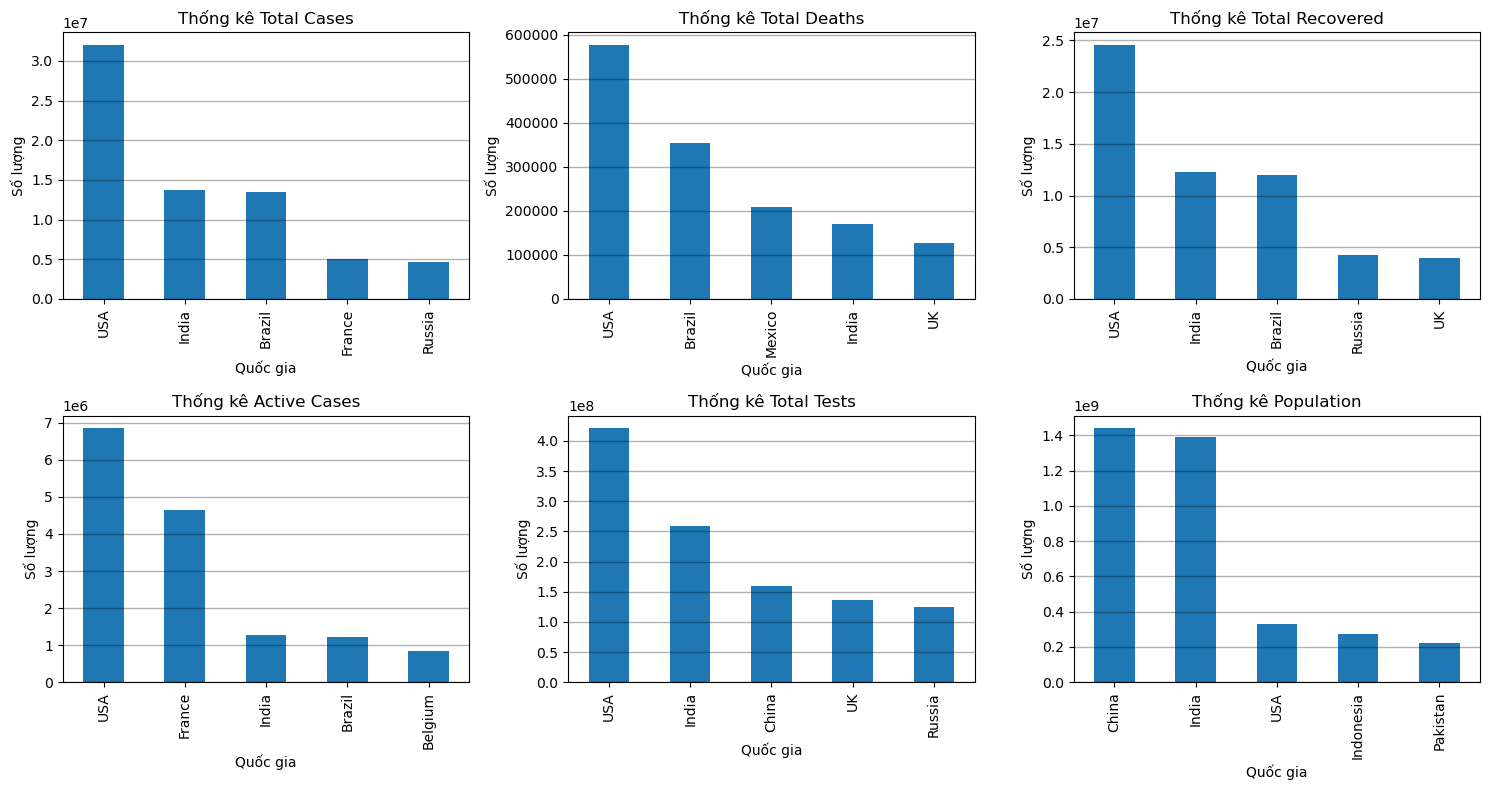

In [10]:
# TODO: draw 6 bar charts
# raise NotImplementedError('not implemented')
# Plotting bar charts
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

for i, column in enumerate(df.columns[1:]):
    ax = axes[i // 3, i % 3]

    # Sort values in descending order and select top 5 countries
    sorted_df = df.sort_values(by=column, ascending=False).head(5)

    # Plot bar chart
    sorted_df.plot(kind='bar', x='Country Name', y=column, ax=ax, legend=False)

    ax.set_title(f'Thống kê {column}')
    ax.set_xlabel('Quốc gia')
    ax.set_ylabel('Số lượng')
    
    # Add horizontal lines at y ticks with alpha for transparency
    for y_tick in ax.get_yticks()[:-1]:
        ax.axhline(y_tick, color='black', linestyle='-', linewidth=1, alpha=0.3)

plt.tight_layout()
plt.show()

**TODO**: Comment about the chart

- This consists of 6 bar charts displaying the top 5 countries for each of the following indices: Total Cases, Total Deaths, Total Recovered, Active Cases, Total Tests, and Population.

- The USA is the country with the largest values in the indices of Total Cases, Total Deaths, Total Recovered, Active Cases, and Total Tests, but it ranks third in terms of Population.

- Additionally, there are also countries with large values in the indices: India, UK, France, China, and Russia.

### Requirement #3: Draw world map

- Using bar chart just gives you a little bit information about numbers
- In this requirement, you are going to draw a world map with circles which shows the number of cases for each country. Specifically, you are provided a file named `coord.json` that contains longitude and latitude of each country. You are going to use `Total cases` and `Total Death` to draw the following charts

C:\Users\Admin\AppData\Local\Temp\ipykernel_4772\2989954349.py:40: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
C:\Users\Admin\AppData\Local\Temp\ipykernel_4772\2989954349.py:40: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


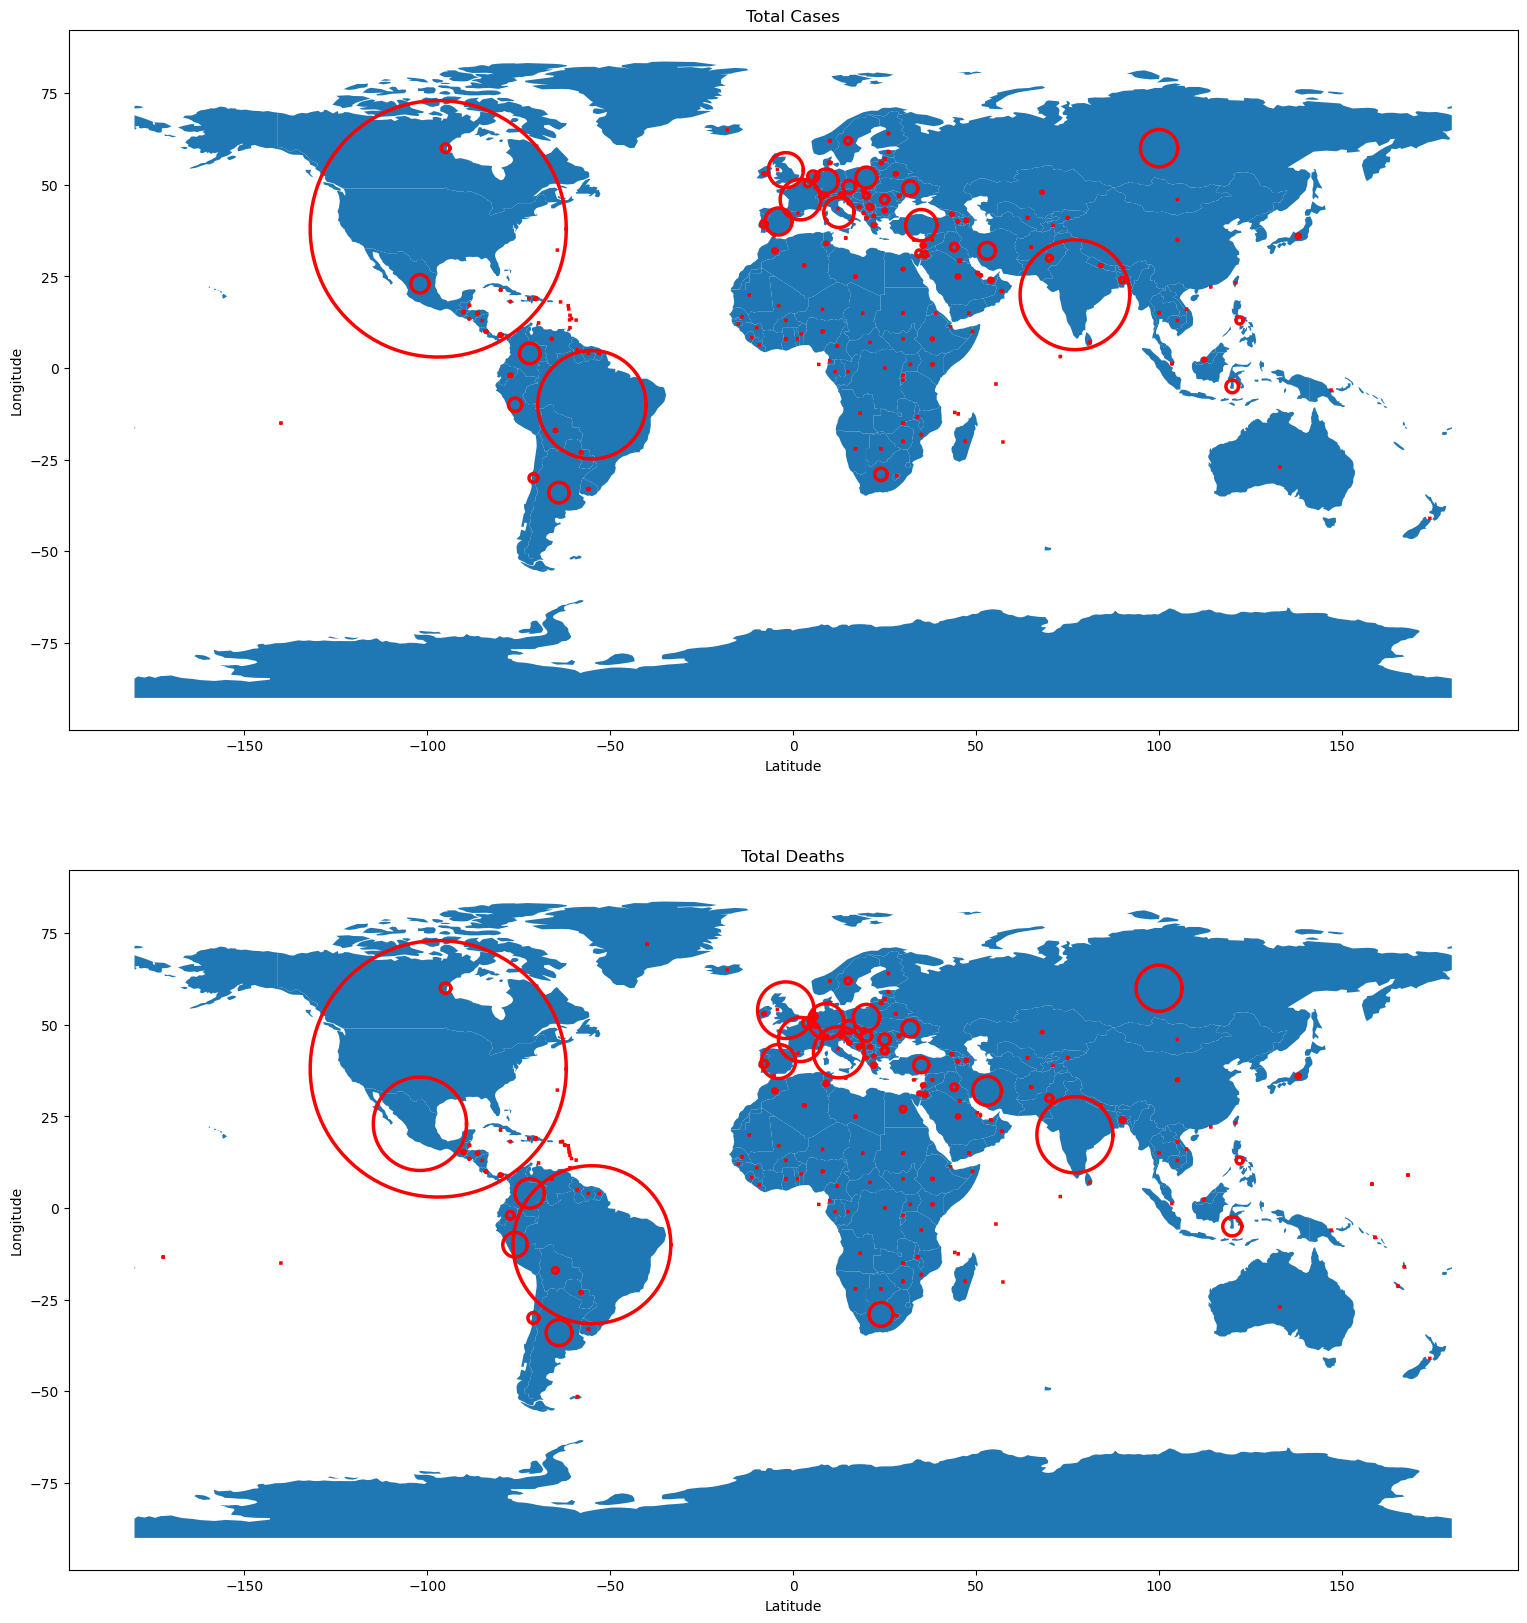

In [11]:
# TODO: draw 2 world map chart using geopandas
#=================================================================================================================================
# Load the coordinates from coord.json
with open('./data/coord.json') as f:
    coordinates = json.load(f)

# Create a DataFrame from the coordinates
df_coordinates = pd.DataFrame(coordinates)

# Assuming df is your DataFrame with the dataset
# (Replace df with your actual DataFrame containing 'Country Name', 'Total Cases', and 'Total Deaths')

# Merge the DataFrame with the coordinates based on 'Country Name'
merged = pd.merge(df, df_coordinates, left_on='Country Name', right_index=True)


#=================================================================================================================================

def find_divisor(total):
    max_radius = 35
    max_total = total.max()
    divisor = max_total / max_radius
    
    return divisor

def Tinh_duong_tron(lat, long, total_cases, divisor_num):
    
    radius = total_cases / divisor_num  # Bán kính của đường trònn
    theta = np.linspace(0, 2 * np.pi, 100)  # Góc theta từ 0 đến 2*pi radian
    x = radius * np.cos(theta) + long
    y = radius * np.sin(theta) + lat
    return x,y


def Draw_world_map(ax, name_column, merged):
    # Chuyển DataFrame thành GeoDataFrame
    gdf_point = geopandas.GeoDataFrame(merged, geometry=geopandas.points_from_xy(merged['long'], merged['lat']), crs="EPSG:4326")

    # Tải dữ liệu bản đồ thế giới
    world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

    # Sử dụng đối tượng ax để vẽ trên cùng một subplot
    world.plot(ax=ax, figsize=(20, 10))
    ax.set_title(name_column)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')    

    divisor_num = find_divisor(merged[name_column])

    # Vẽ đường tròn trên bản đồ
    for index, row in merged.iterrows():
        x,y = Tinh_duong_tron(row['lat'], row['long'], row[name_column], divisor_num)
        ax.plot(x, y, color='red', linewidth=2.5)
      
    
# Tạo một đối tượng plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 20))

# Vẽ biểu đồ cho 'Total Cases'
Draw_world_map(ax1, 'Total Cases', merged)


# Vẽ biểu đồ cho 'Total Deaths'
Draw_world_map(ax2, 'Total Deaths', merged)

# Hiển thị biểu đồ
plt.show()

# raise NotImplementedError('not implemented')

**TODO**: Comment about the chart

- The two charts above depict Total Cases and Total Deaths of countries on the world map.
- In the Americas, the USA and Brazil have large values. India is the region with large values in Asia.
- In Europe, the values are distributed relatively evenly among countries. In Africa, the values are very small or negligible.

### Requirement #4: Relationship between 2 variables

- Exploring the relationship between variables is a needed task to do
- You will start with exploring the linear relationship between 2 variables. In order to do so, draw $C_6^2=15$ scatter plots. For each plot, draw a line that shows the linear relationship of variables. You should implement the line yourself instead of using library.

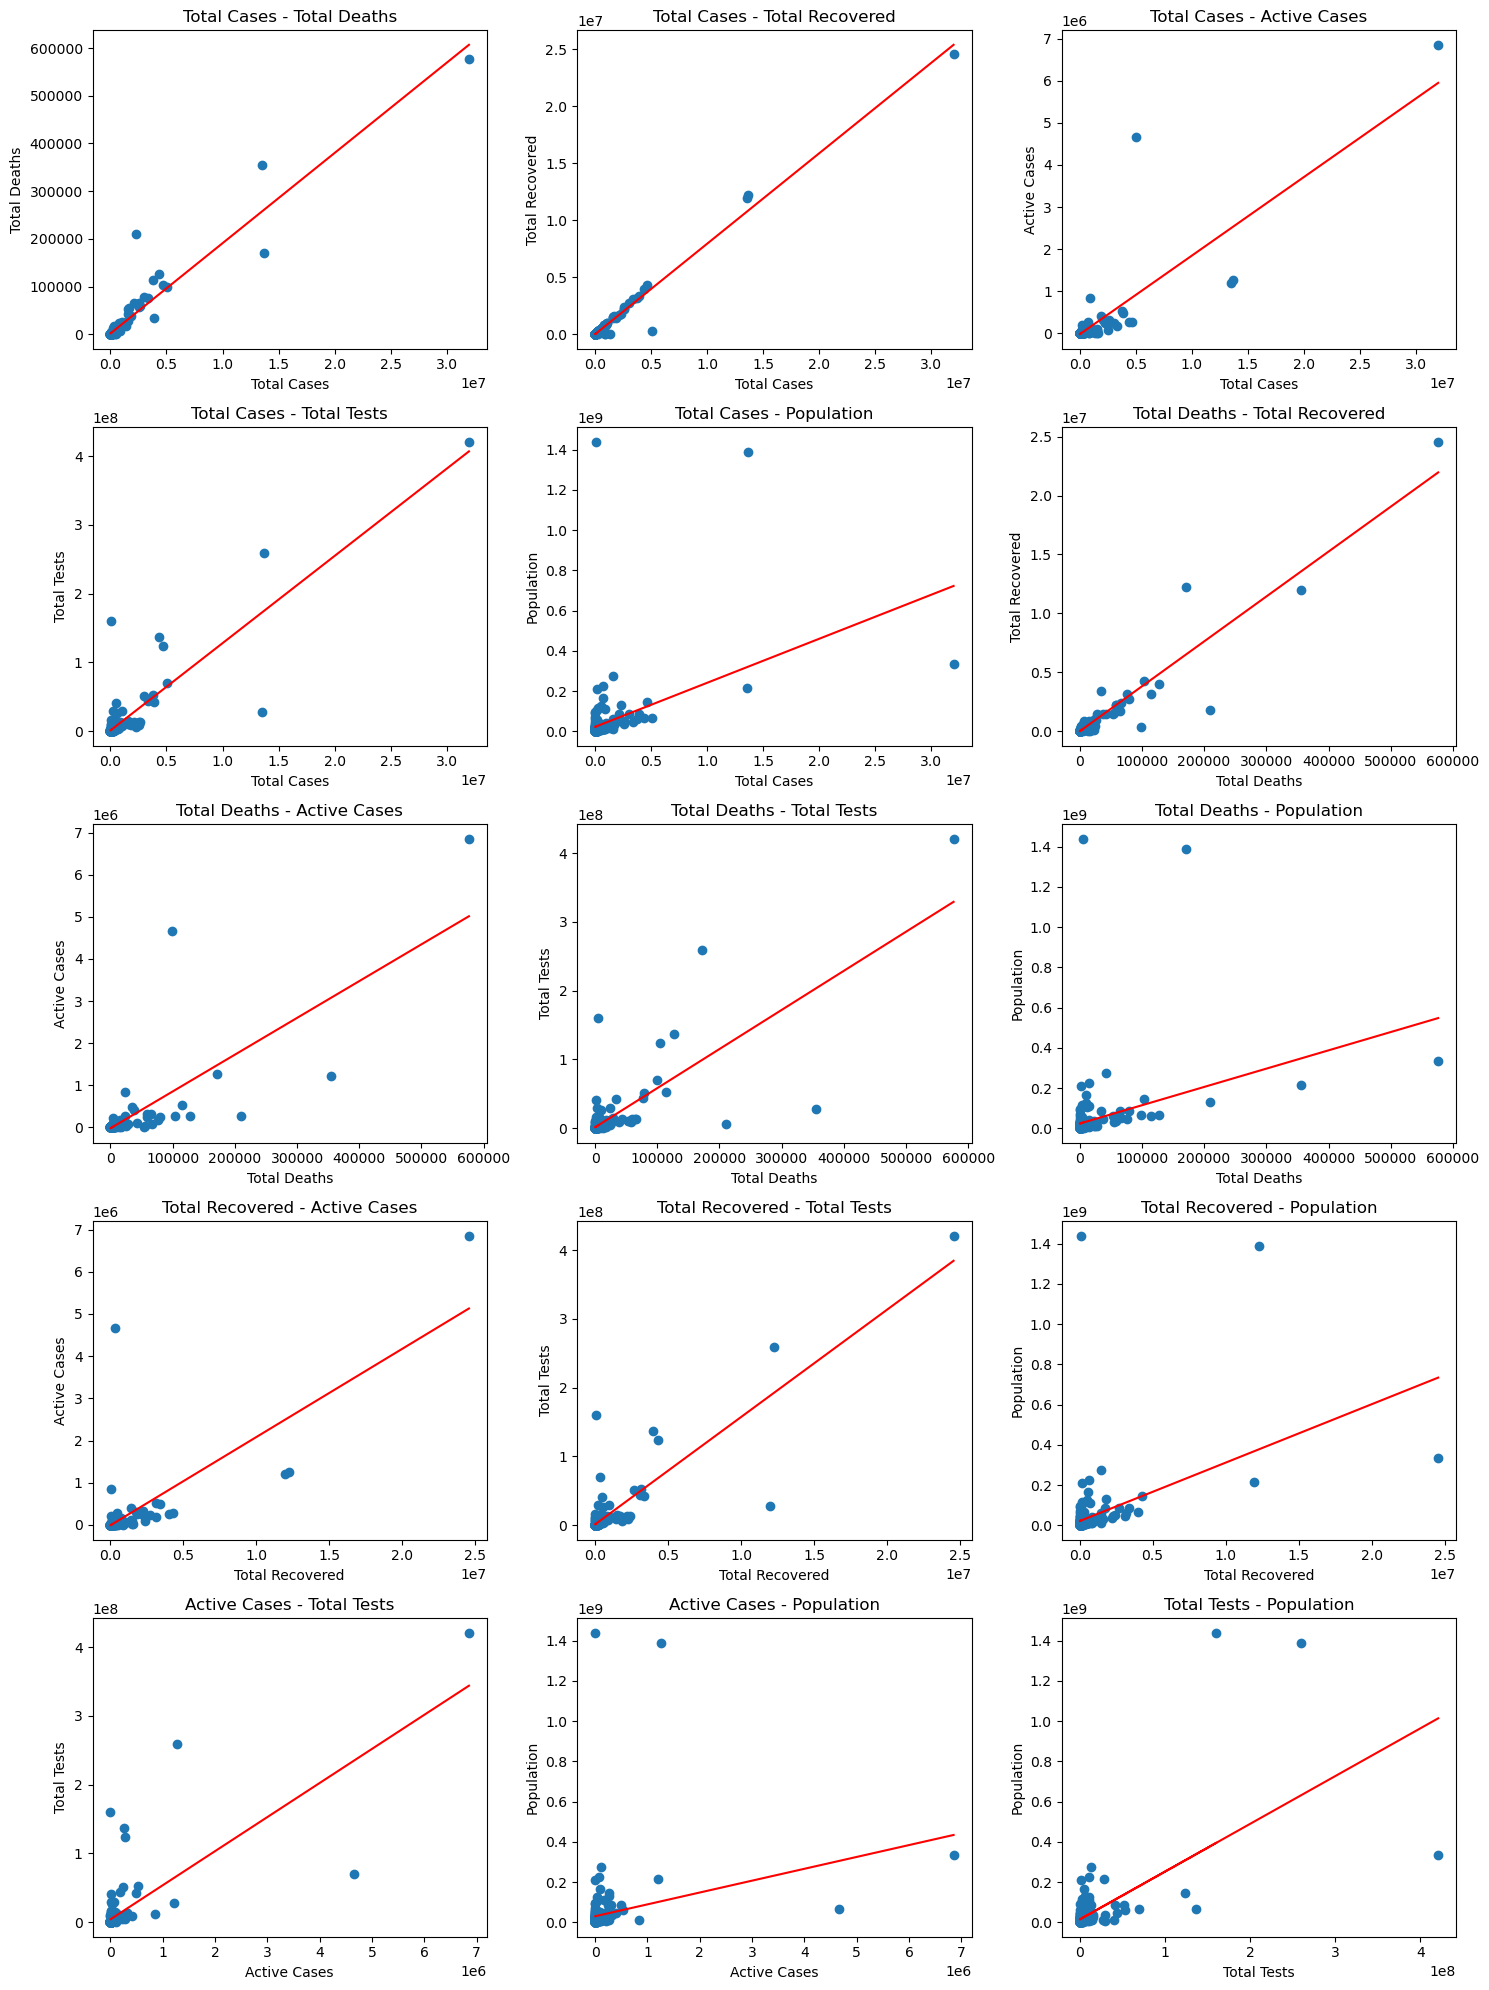

In [12]:
# TODO: scatter stuff
# raise NotImplementedError('not implemented')
def Relationship_between_2_variables(df):
    # Tạo tất cả các cặp thuộc tính
    pairs = [(df.columns[i], df.columns[j]) for i in range(len(df.columns)) for j in range(i + 1, len(df.columns))]

    # Vẽ scatter plots và đường tuyến tính cho từng cặp thuộc tính
    plt.figure(figsize=(15, 20))

    for i, pair in enumerate(pairs, 1):
        plt.subplot(5, 3, i)
    
        # Vẽ scatter plot
        plt.scatter(df[pair[0]], df[pair[1]])
        
        # Calculate the regression line
        slope, intercept = np.polyfit(df[pair[0]], df[pair[1]], 1)
    
        # Plot only the red line
        plt.plot(df[pair[0]], slope * df[pair[0]] + intercept, color='red')    
    
        plt.title(f'{pair[0]} - {pair[1]}')
        plt.xlabel(pair[0])
        plt.ylabel(pair[1])

    plt.tight_layout()
    plt.show()
Relationship_between_2_variables(df.drop('Country Name', axis = 1))

**TODO**: As showed above, give your prediction about the relationship between each pair.

**Positive correlation:**
- Total Cases - Total Deaths: As the total number of cases increases, the total number of deaths is likely to increase.
- Total Cases - Total Recovered: Higher total cases may result in a higher number of recoveries.
- Total Cases - Active Cases: The total number of cases includes active cases, so as total cases increase, active cases are expected to increase.
- Total Cases - Total Tests: Conducting more tests tends to identify more cases, contributing to an increase in total cases.
- Total Deaths - Active Cases: As the number of active cases increases, the total number of deaths is expected to increase.
- Total Recovered - Total Tests: Conducting more tests can contribute to identifying and recovering more cases.


**Negative correlation:**
- Total Recovered - Active Cases: As the number of active cases decreases (through recovery or death), the number of recovered cases should increase.

**Variable relationship:**   
- .Total Cases - Population: The relationship between total cases and population may vary based on factors such as population density and healthcare infrastructure.
- Total Deaths - Total Recovered: The relationship between total deaths and total recoveries may vary based on healthcare infrastructure.
- Total Deaths - Total Tests: The relationship between total deaths and total Tests may vary based on healthcare infrastructure.
- Total Deaths - Population: The relationship between total deaths and Population may vary based on healthcare infrastructure.
- Total Recovered - Population: The relationship between total Recovered and Population may vary based on healthcare infrastructure.
- Active Cases - Total Tests: More tests can lead to the identification of more active cases.
- Active Cases - Population: The relationship between active cases and population may vary based on factors such as population density and healthcare infrastructure.
- Total Tests - Population: The relationship between active cases and population may vary based on factors such as population density and healthcare infrastructure.


### Requirement #5: Double check the relationship between 2 variables

- In order to make sure about the linear relationship, you have to check each pair with **Pearson correlation coefficient**
- Specifically, $\rho$ is calculated as follows:

$$\rho_{X, Y} = \frac{cov(X, Y)}{\sigma_X \sigma_Y}$$

- Then, plot these 15 values using heatmap

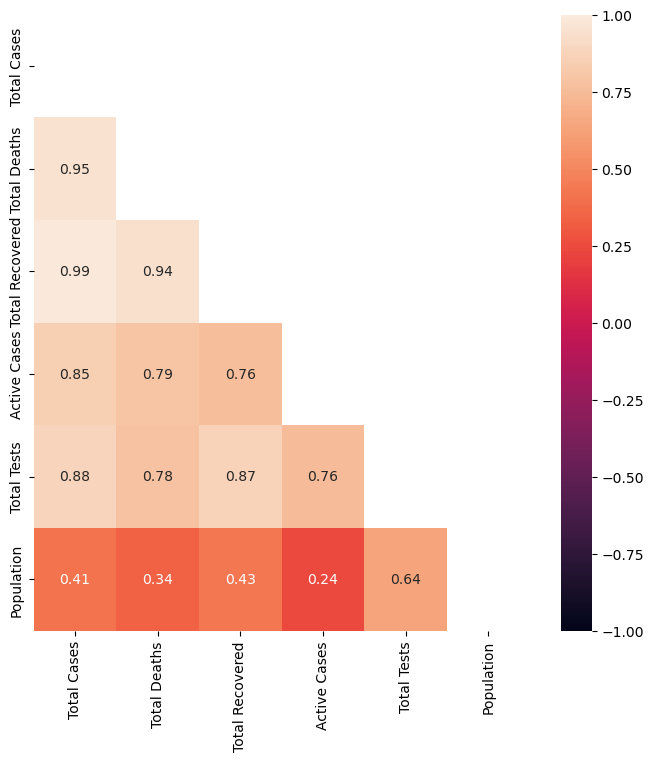

In [13]:
# TODO: create heatamp
df_copy = df.copy()

# Exclude the categorical features from the matrix
df_copy.drop('Country Name', inplace=True, axis='columns')

# Calculate the correlation matrix
corr_matrix = df_copy.corr()

# Mask the upper triangular part of the matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))



# plot a correlation matrix
fig, ax = plt.subplots(figsize=(8,8))
sn.heatmap(df_copy.corr(), annot=True , mask=mask ,ax=ax, vmin=-1, vmax=1)
plt.show()

# raise NotImplementedError('not implemented')

For now, you can check whether your prediction is right or wrong!

## Model visualization

- In this section, we are going to visualize the training and testing process of machine learning model
- The process of training and testing a model is as follow:
    1. Prepare data for training and testing
    2. Create a model
    3. Train and test the model
    4. Visualize the result

- You are required to:
    1. Study Multi-layer neural network and Convolutional neural network
    2. Study `Pytorch` in order to prepare data and design machine learning model
    3. Design 2 models to classify MNIST dataset. Then, visualize the result of each model and compare the result to each other
        - Model 1: A fully-connected model with 4 layers. The input layer has $784$ neurons. The hidden layer #1 has $1024$ neurons, which is followed by a $ReLU$ as activation functions. The hidden layer #2 has $512$ neurons, also followed by a $ReLU$ as activation functions. The output layer has $10$ neurons (of course), which follows by a $LogSoftmax$ function
        - Model 2: A CNN model with 2 Convolution layers and 1 linear layer. All the CNN layers have 20 filters, kernel size equal to $5$. Each of them is followed by a $ReLU$ activation function and a MaxPooling2D layer ($kernel\_size=2$). The linear layer is followed by a $LogSoftmax$ activation function

- Google Colab can be used since it provides free GPU, which makes your training and testing process faster

### Requirement #6: Prepare data

- `Pytorch` supports a lot of datasets for running machine learning model. In this lab, we use MNIST dataset. So, download the training set and the testing set using `Pytorch` and store them in `./data`
- Note that you have to transform your data into `tensor` (a datatype that's quite similar to `numpy array`) so you can input to model
- After that, create `train_dataloader` and `test_dataloader`

**TODO**: Explain why we have to create dataloader

- Batch Processing: Dataloader allows you to process the data in batches rather than feeding the entire dataset at once. This is especially important when working with large datasets as it helps manage memory efficiently.

- Shuffling: Dataloader allows shuffling of the data during training. Shuffling helps prevent the model from memorizing the order of the data, which can be beneficial for generalization.

- Parallelization: Dataloader supports data loading in parallel. It can load multiple batches simultaneously, taking advantage of parallel processing capabilities of modern hardware, which speeds up the training process.

- Ease of Use: Dataloader is designed to work seamlessly with PyTorch models. It provides an easy-to-use interface for iterating over the dataset, handling batching, shuffling, and other data processing tasks.

In [14]:
# TODO: download training, testing data and store them into training_data and testing_data
# Then, create train_dataloader and test_dataloader with batch_size=32
# raise NotImplementedError('not implemented')

training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=True)


- After downloading the data, visualize 10 random samples (2 rows, 5 samples for each row) from training set.

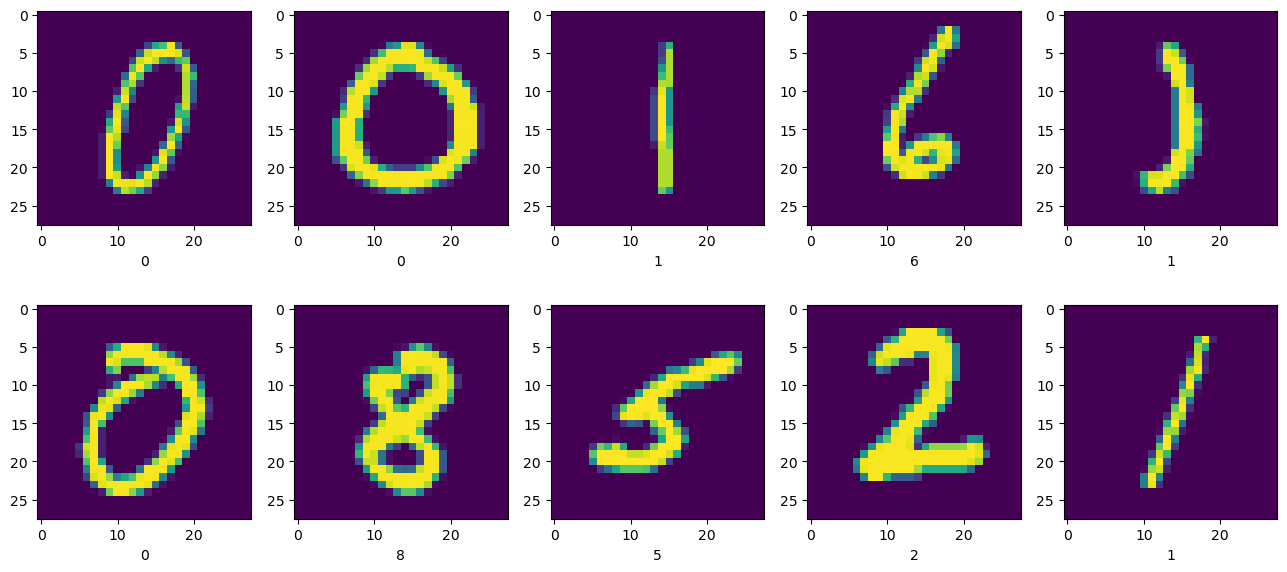

In [15]:
# TODO: visualize 10 random samples
# raise NotImplementedError('not implemented')

figure = plt.figure(figsize=(16, 7))
cols, rows = 5, 2
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.xlabel(label)
    plt.imshow(img.squeeze())
plt.show()


### Requirement #7: Create models

- Create 2 models as mentioned above. Call them `Mnist_FC` and `Mnist_CNN`
- **I strongly recommend that you should slowly implement, print out the output and its shape of each layer in order to get a deep understanding of what you are trying to do**
- Before moving to the next requirement, you should test your model with a random sample of the dataset. In case you create code cells for testing, remember to remove these cells

In [16]:
# TODO: create Mnist_FC and Mnist_CNN

# ========== FC model ==========
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

Mnist_FC = NeuralNetwork()

# ========== CNN model ==========
class MultiLayerCNN(nn.Module):
    def __init__(self):
        super(MultiLayerCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(10, 20, 5)
        self.fc = nn.Linear(320,10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 320)
        x = nn.functional.log_softmax(self.fc(x),dim=1)
        return x

Mnist_CNN = MultiLayerCNN()

         
# raise NotImplementedError('not implemented')

### Requirement #8: Train and test models

- Design `train` and `test` function with the parameters provided in the following code cell
    - `train` function trains the model with all the data in training set
    - `test` function tests the model with all data in testing set

- Return the accuracy (e.g. $0.847351$) after training and testing

**TODO**: Explain the parameters of `train` and `test` function. In `test` function, there is a line of code that says `with torch.no_grad()`. Why do we have this line of code?

- Parameters of `train`:
    - dataloader: The DataLoader object providing batches of training data.
    - model: The PyTorch model being trained.
    - loss_fn: The loss function used to compute the loss between predicted and target values.
    - optimizer: The optimization algorithm used for updating the model parameters.


- Parameters of `test`:
    - dataloader: The DataLoader object providing batches of testing data.
    - model: The PyTorch model being evaluated.

- The function evaluates the model on test data. The key line is `with torch.no_grad()`, which is used to temporarily disable gradient computation during inference. Increases computational efficiency, because model parameters are not updated. reduces memory usage and speeds up the inference process.


In [17]:
# TODO: design train and test function

# check gpu
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Using {device} for training and testing')


def train(dataloader, model, loss_fn, optimizer):
    # raise NotImplementedError('not implemented')
    size = len(dataloader.dataset)
    acc = 0
    
    for batch, (X, y) in enumerate(dataloader):        
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        acc += (pred.argmax(1) == y).type(torch.float).sum().item()

        # if batch % 100 == 0:
        #     loss, current = loss.item(), batch * len(X)
        #     print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    
    acc /= size
    return acc

def test(dataloader, model):
    size = len(dataloader.dataset)
    acc = 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            
            acc += (pred.argmax(1) == y).type(torch.float).sum().item()
            
    acc /= size
    return acc


Using cpu for training and testing


- Run 20 epochs for each model. In order to do so, at fist, you have to define `learning_rate, loss_fn` and `optimizer`. I will help you on that

- Save the history of training and testing process as `history_fc` and `history_cnn`. During the running process, you should print out the accuracy in order to keep track

- The history is a dictionary with the following structure:

```python
history = {
    1: [0.6, 0.5], # the key (type: int) is the epoch
    2: [0.7, 0.6], # the value (type: list) contains the accuracy of training and testing process at the corresponding epoch
    ...
}
```

**TODO**: List out some loss functions and optimizers that you have heard about

- Loss Functions:
    - CrossEntropyLoss: Used for classification problems, especially when the classes are mutually exclusive.
    - MSELoss (Mean Squared Error Loss): Suitable for regression problems where the goal is to minimize the squared difference between predicted and target values.
    - NLLLoss (Negative Log Likelihood Loss): Used for training a classification model with a softmax final layer.

- Optimizers:
    - SGD (Stochastic Gradient Descent): The classic optimization algorithm that updates model parameters in the opposite direction of the gradient.
    - Adam (Adaptive Moment Estimation): An adaptive optimization algorithm that combines ideas from RMSProp and Momentum. It adapts the learning rates of each parameter.
    - RMSProp (Root Mean Square Propagation): An adaptive optimization algorithm that divides the learning rate for a parameter by the square root of the mean of the past squared gradients.

In [18]:
# define model

loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer = torch.optim.SGD(Mnist_FC.parameters(), lr=learning_rate)
optimizer_CNN = torch.optim.SGD(Mnist_CNN.parameters(), lr=learning_rate)

# TODO: run 20 epochs for Mnist_FC and Mnist_CNN

epochs = 20

history_fc = {i: [] for i in range(1, epochs + 1)}
history_cnn = {i: [] for i in range(1, epochs + 1)}




def find_accuracy(history, train_dataloader, test_dataloader, model, loss_fn, optimizer, epochs):
    
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        history_temp = []

        train_acc = train(train_dataloader, model, loss_fn, optimizer)
        test_acc = test(test_dataloader, model)

        print(f"Training acc: {round(train_acc, 3)}")
        print(f"Testing acc: {round(test_acc, 3)} \n")

        
        history_temp.append(train_acc)
        history_temp.append(test_acc)
        
    
        history[t+1] = history_temp

    # print("Done!")


print("========== FC model ==========")
find_accuracy(history_fc, train_dataloader, test_dataloader, Mnist_FC, loss_fn, optimizer, epochs)


print("========== CNN model ==========")
find_accuracy(history_cnn, train_dataloader, test_dataloader, Mnist_CNN, loss_fn, optimizer_CNN, epochs)


# raise NotImplementedError('not implemented')

========== FC model ==========
Epoch 1
-------------------------------
Training acc: 0.389
Testing acc: 0.516 

Epoch 2
-------------------------------
Training acc: 0.531
Testing acc: 0.553 

Epoch 3
-------------------------------
Training acc: 0.555
Testing acc: 0.586 

Epoch 4
-------------------------------
Training acc: 0.585
Testing acc: 0.609 

Epoch 5
-------------------------------
Training acc: 0.605
Testing acc: 0.624 

Epoch 6
-------------------------------
Training acc: 0.617
Testing acc: 0.635 

Epoch 7
-------------------------------
Training acc: 0.626
Testing acc: 0.645 

Epoch 8
-------------------------------
Training acc: 0.633
Testing acc: 0.651 

Epoch 9
-------------------------------
Training acc: 0.638
Testing acc: 0.654 

Epoch 10
-------------------------------
Training acc: 0.642
Testing acc: 0.657 

Epoch 11
-------------------------------
Training acc: 0.645
Testing acc: 0.658 

Epoch 12
-------------------------------
Training acc: 0.647
Testing acc: 0.

### Requirement #9: Visualize

- Produce a graph as the following code cell and comment about the running process of 2 models

**TODO**: Your comment
- The two charts illustrate the variation in accuracy over 20 epochs for both CNN and FC models.
- At the beginning, the accuracy is very low. However, after training, the accuracy increases rapidly, and afterward, the increase is minimal, converging towards a certain value.
- From the two charts, it can be observed that the CNN model has a higher accuracy and a faster rate of accuracy improvement compared to the FC model.


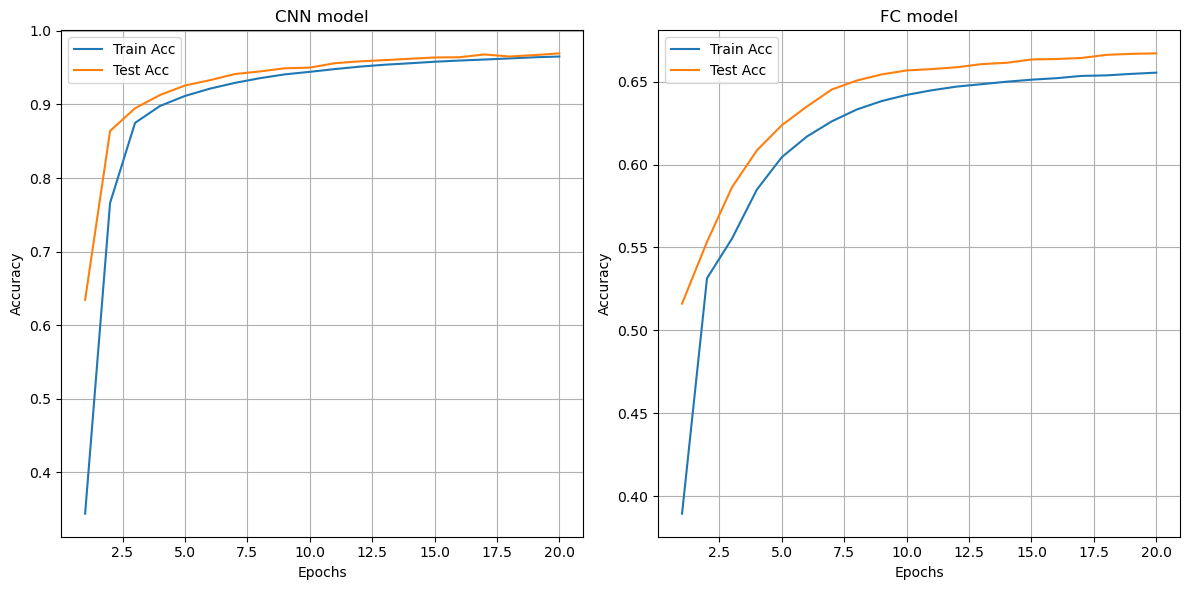

In [19]:
# TODO: visualize the history

epochs = list(history_cnn.keys())
train_acc_model1 = [item[0] for item in history_cnn.values()]
test_acc_model1 = [item[1] for item in history_cnn.values()]

train_acc_model2 = [item[0] for item in history_fc.values()]
test_acc_model2 = [item[1] for item in history_fc.values()]

plt.figure(figsize=(12, 6))

# Model 1
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc_model1, label='Train Acc')
plt.plot(epochs, test_acc_model1, label='Test Acc')
plt.title('CNN model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Model 2
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc_model2, label='Train Acc')
plt.plot(epochs, test_acc_model2, label='Test Acc')
plt.title('FC model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
# raise NotImplementedError('not implemented')

- Highly recommend you go play around with the parameters of models and re-implement 2 models using `TensorFlow` on Colab